# Mnist

First part follows [Tensorflow dataset guide](https://www.tensorflow.org/datasets/overview) to demonstrate TFDS usage.

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

keras = tf.keras
tf.__version__

'2.5.0'

# Demonstration of Different Data Loaders

In [2]:
builders = tfds.list_builders()
builders[:5]

['abstract_reasoning', 'accentdb', 'aeslc', 'aflw2k3d', 'ag_news_subset']

In [3]:
ds = tfds.load('mnist', split = 'train', shuffle_files = True)
ds

<_OptionsDataset shapes: {image: (28, 28, 1), label: ()}, types: {image: tf.uint8, label: tf.int64}>

In [4]:
# Use tfds.builder

builder = tfds.builder('mnist')
builder.download_and_prepare()
ds = builder.as_dataset(split = 'train', shuffle_files = True)
ds

<_OptionsDataset shapes: {image: (28, 28, 1), label: ()}, types: {image: tf.uint8, label: tf.int64}>

In [5]:
## As dict
for example in ds.take(2):
    print(list(example.keys()))
    image = example['image']
    label = example['label']
    print(image.shape, label)

['image', 'label']
(28, 28, 1) tf.Tensor(1, shape=(), dtype=int64)
['image', 'label']
(28, 28, 1) tf.Tensor(7, shape=(), dtype=int64)


In [6]:
## As tuple (as_supervised = True)
ds = tfds.load('mnist', split = 'train', as_supervised = True)
for image, label in ds.take(1):
    print(image.shape, label)

(28, 28, 1) tf.Tensor(4, shape=(), dtype=int64)


In [7]:
## As numpy

for image, label in tfds.as_numpy(ds.take(2)):
    print(image.shape, label)
    print(type(image), type(label))

(28, 28, 1) 4
<class 'numpy.ndarray'> <class 'numpy.int64'>
(28, 28, 1) 1
<class 'numpy.ndarray'> <class 'numpy.int64'>


In [8]:
## Load full dataset in a single batch (batch_size = -1)
ds = tfds.load('mnist', split = 'train', batch_size = 2, as_supervised = True)
for image, label in tfds.as_numpy(ds.take(3)):
    print(image.shape)

ds = tfds.load('mnist', split = 'test', batch_size = -1, as_supervised = True)
image, label = tfds.as_numpy(ds)
print(image.shape)

(2, 28, 28, 1)
(2, 28, 28, 1)
(2, 28, 28, 1)
(10000, 28, 28, 1)


# Benchmark Datasets

In [9]:
batch_size = 32
ds = tfds.load('mnist', split = 'train')
# ds = ds.prefetch(1)
ds = ds.batch(batch_size).prefetch(1)

# https://www.tensorflow.org/datasets/api_docs/python/tfds/benchmark
tfds.benchmark(ds, batch_size = batch_size)
tfds.benchmark(ds, batch_size = batch_size)

  0%|          | 1/1875 [00:00<?, ?it/s]


************ Summary ************

Examples/sec (First included) 57111.48 ex/sec (total: 60000 ex, 1.05 sec)
Examples/sec (First only) 1317.78 ex/sec (total: 32 ex, 0.02 sec)
Examples/sec (First excluded) 58431.62 ex/sec (total: 59968 ex, 1.03 sec)


  0%|          | 1/1875 [00:00<?, ?it/s]


************ Summary ************

Examples/sec (First included) 309057.17 ex/sec (total: 60000 ex, 0.19 sec)
Examples/sec (First only) 2434.41 ex/sec (total: 32 ex, 0.01 sec)
Examples/sec (First excluded) 331325.95 ex/sec (total: 59968 ex, 0.18 sec)


,duration,num_examples,avg
first+lasts,0.194139,60000,309057.167541
first,0.013145,32,2434.410144
lasts,0.180994,59968,331325.951563


# Visualization

In [10]:
# Set with_info = True for visualization
ds, info = tfds.load('mnist', split = 'train', with_info = True)

tfds.as_dataframe(ds.take(4), info)

,image,label
0,,4
1,,1
2,,0
3,,7


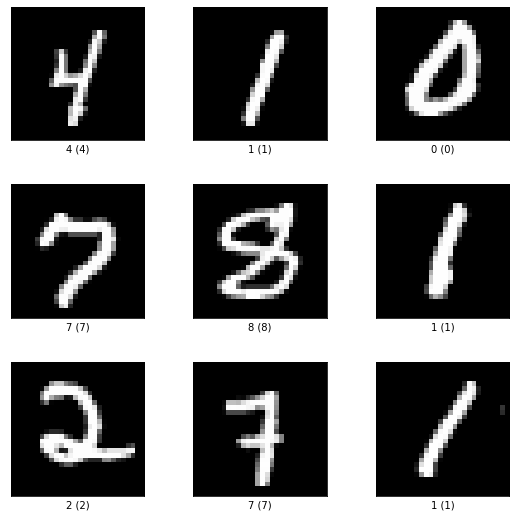

In [11]:
ds, info = tfds.load('mnist', split = 'train', with_info = True)

fig = tfds.show_examples(ds, info)

# Access the Dataset Metadata

In [12]:
ds, info = tfds.load('mnist', with_info = True)
info.features['label']

ClassLabel(shape=(), dtype=tf.int64, num_classes=10)

In [13]:
print(info.features['label'].num_classes)
print(info.features['label'].names)
print(info.features['label'].int2str(7))

10
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
7


In [14]:
print(info.features.shape)
print(info.features['image'])

{'image': (28, 28, 1), 'label': ()}
Image(shape=(28, 28, 1), dtype=tf.uint8)


In [15]:
print(info.splits)

{'test': <SplitInfo num_examples=10000, num_shards=1>, 'train': <SplitInfo num_examples=60000, num_shards=1>}


In [16]:
print(info.splits['train[15%:75%]'].num_examples)

36000


# From TFDS to Keras

The second part mainly follows [Keras Example Guide](https://www.tensorflow.org/datasets/keras_example).

In [17]:
# https://www.tensorflow.org/datasets/api_docs/python/tfds/load
(train_ds, valid_ds, test_ds), info = tfds.load(
    'mnist',
    split = ['train[:80%]', 'train[80%:]', 'test'],
    shuffle_files = True, 
    as_supervised = True, # Make it supervised tuples
    with_info = True,     # Retrieve metadata
)

In [18]:
print(info.features['image'].dtype)
print(info.splits['train'].num_examples)
print(info.features['image'].shape)
input_shape = (info.features['image'].shape)
print(input_shape)

<dtype: 'uint8'>
60000
(28, 28, 1)
(28, 28, 1)


In [19]:
# Normalize the uint8 to float
def normalize_image(image, label):
    return tf.cast(image, tf.float32) / 255.0, label

batch_size = 128

# reshuffle_each_iteration = False, since we want to test for different model(or rebuild the model), the input sequence should be the same
# However, it would make input sequence for each iteration same.
# Origally, I think True can still make the first input same, but it doesn't.
def create_train_set(ds, seed = 1, reshuffle_each_iteration = False):
    # https://www.tensorflow.org/api_docs/python/tf/data/Dataset#map
    ds = ds.map(normalize_image, num_parallel_calls = tf.data.AUTOTUNE)
    # Transformation should be called before cache
    ds = ds.cache()
    # https://www.tensorflow.org/api_docs/python/tf/data/Dataset#shuffle
    # Use 1000 for bigger larger set to fit in memory
    # If we set seed, then the first epoch for this dataset would always start from the same sequence
    ds = ds.shuffle(info.splits['train'].num_examples, seed = seed, reshuffle_each_iteration = reshuffle_each_iteration)
    ds = ds.batch(batch_size)
    # https://www.tensorflow.org/api_docs/python/tf/data/Dataset
    ds = ds.prefetch(tf.data.AUTOTUNE)
    return ds


In [20]:
# We don't call shuffle on validation/test set
def create_valid_test_set(ds):    
    ds = ds.map(normalize_image, num_parallel_calls = tf.data.AUTOTUNE)
    ds = ds.batch(batch_size)
    # https://www.tensorflow.org/api_docs/python/tf/data/Dataset#cache
    # For test/test set, we cache after batch
    ds = ds.cache()
    test_ds = ds.prefetch(tf.data.AUTOTUNE)
    return ds


In [21]:
train_ds_batched = create_train_set(train_ds)
valid_ds_batched = create_valid_test_set(valid_ds)
test_ds_batched = create_valid_test_set(test_ds)

In [22]:
import pandas as pd
import numpy as np

tf.random.set_seed(1)
np.random.seed(1)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = input_shape),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(10)
])

model.compile(
    optimizer = 'adam',
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics = [keras.metrics.SparseCategoricalAccuracy()],
)

early_stopping = keras.callbacks.EarlyStopping(patience = 10, restore_best_weights = True)

history = model.fit(
    train_ds_batched,
    epochs = 500,
    validation_data = valid_ds_batched,
    callbacks = [early_stopping],
)

history_df = pd.DataFrame(history.history)
print(f'val_loss: {history_df.val_loss.min():.4f} - val_sparse_categorical_accuracy: {history_df.val_sparse_categorical_accuracy.max():.4f}')

Epoch 1/500
375/375 [==============================] - 2s 2ms/step - loss: 0.4658 - sparse_categorical_accuracy: 0.8646 - val_loss: 0.2349 - val_sparse_categorical_accuracy: 0.9327
Epoch 2/500
375/375 [==============================] - 0s 1ms/step - loss: 0.2260 - sparse_categorical_accuracy: 0.9354 - val_loss: 0.1759 - val_sparse_categorical_accuracy: 0.9504
Epoch 3/500
375/375 [==============================] - 0s 1ms/step - loss: 0.1735 - sparse_categorical_accuracy: 0.9493 - val_loss: 0.1483 - val_sparse_categorical_accuracy: 0.9557
Epoch 4/500
375/375 [==============================] - 0s 1ms/step - loss: 0.1444 - sparse_categorical_accuracy: 0.9575 - val_loss: 0.1288 - val_sparse_categorical_accuracy: 0.9625
Epoch 5/500
375/375 [==============================] - 0s 1ms/step - loss: 0.1290 - sparse_categorical_accuracy: 0.9614 - val_loss: 0.1186 - val_sparse_categorical_accuracy: 0.9655
Epoch 6/500
375/375 [==============================] - 0s 1ms/step - loss: 0.1109 - sparse_cate

In [23]:
model.evaluate(test_ds_batched)

79/79 [==============================] - 0s 3ms/step - loss: 0.0759 - sparse_categorical_accuracy: 0.9792


[0.07592277228832245, 0.979200005531311]

In [24]:
for image, label in test_ds_batched.take(1):
    predicted = model.predict(image)
    true_labels = label
    break
    
print(predicted.shape)
print(predicted[:1])
print(list(map(np.argmax, predicted[:10])))
print(true_labels[:10].numpy())

pd.DataFrame({'real': true_labels[:10].numpy(), 'predicted': map(np.argmax, predicted[:10])})

(128, 10)
[[-14.500157   -6.972598   14.633423   -2.306548   -5.9908423  -6.6004353
   -6.8253746  -8.3344345  -3.8601477 -12.037413 ]]
[2, 0, 4, 8, 7, 0, 6, 3, 1, 8]
[2 0 4 8 7 0 6 3 1 8]


,real,predicted
0,2,2
1,0,0
2,4,4
3,8,8
4,7,7
5,0,0
6,6,6
7,3,3
8,1,1
9,8,8


# Other Tests

In [25]:
# https://www.tensorflow.org/api_docs/python/tf/data/Dataset#shuffle

ds = tf.data.Dataset.range(3)
dataset = ds.shuffle(2, seed = 1)
print(list(dataset.as_numpy_iterator()))
print(list(dataset.as_numpy_iterator()))

[0, 2, 1]
[1, 0, 2]


In [26]:
dataset = ds.shuffle(2, seed = 1)
print(list(dataset.as_numpy_iterator()))

[0, 2, 1]
